# Problem Set 6

## Yanwei Pan
panyw@uchicago.edu

### Problem 1

In [34]:
#####a#####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix 

auto_df = pd.read_csv('data/Auto.csv', na_values='?')
auto_df.dropna(inplace=True)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


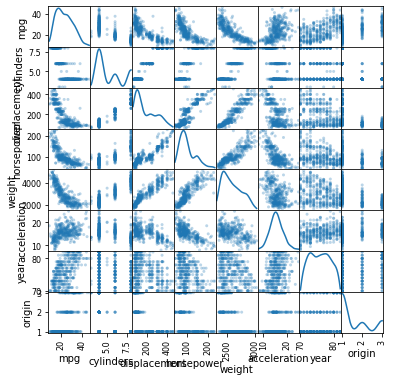

In [16]:
#####b#####
auto_df2 = auto_df[['mpg', 'cylinders', 'displacement', 'horsepower', \
                    'weight', 'acceleration', 'year', 'origin']]
scatter_matrix(auto_df2, alpha=0.3, figsize=(6, 6), diagonal='kde')
plt.show()

In [17]:
#####c#####
auto_df2.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [21]:
#####d#####
auto_df2['const'] = 1
reg1 = sm.OLS(endog=auto_df2['mpg'], exog=auto_df2[['const', 'cylinders', 'displacement', \
                                                    'horsepower', 'weight', 'acceleration',\
                                                    'year', 'origin']], missing='drop')
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        19:48:03   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

i. Coefficients of displacement, weight, year and origin are statistically significant at the 1% level.  
ii. Coefficients of cylinders, horsepower, acceleration are not statistically significant at the 10% level.  
iii. As the vehicle year increases one unit, the miles per gallon increase 0.75 unit.  

In [24]:
#####e#####

From the scatterplot matrix from part (b), displacement, horsepower and weight are the three variables that look most likely to have a nonlinear relationship with $mpg_i$.

In [27]:
###i###
auto_df2['displacement_2'] = auto_df2['displacement'] ** 2
auto_df2['horsepower_2'] = auto_df2['horsepower'] ** 2
auto_df2['weight_2'] = auto_df2['weight'] ** 2
auto_df2['acceleration_2'] = auto_df2['acceleration'] ** 2

exo_2 = auto_df2[['const', 'cylinders','displacement','horsepower','weight',\
                  'acceleration', 'year', 'origin', 'displacement_2', 'horsepower_2',\
                  'weight_2', 'acceleration_2']]
reg2 = sm.OLS(endog=auto_df2['mpg'], exog=exo_2, missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          1.75e-160
Time:                        20:11:16   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.1084      6.696      3.

ii. The adjusted R-squared is 0.866, which is higher than 0.818 in the model from part (d). Thus, it's better than the adjusted R-squared from part (d).  
iii. The statistical significance of the $displacement_i$ variable coefficient changed a lot. It is now not significant at the 1% level. And the coefficient on its squared term is also insignificant at the 1% level.  
iv. The statistical significance of cylinders coefficient decreased in the new model. It is still insignificant in the new model at the 10% level.

In [32]:
#####f#####
pred = results2.predict(exog=[1, 6, 200, 100, 3100, 15.1, 99, 1, 200 ** 2, \
                       100 ** 2, 3100 ** 2, 15.1 ** 2])
print('The predicted mpg=', pred[0])

The predicted mpg= 38.73211109741097


### Problem 2

In [35]:
#####a#####
knn_df = pd.DataFrame({"X1":[0, 2, 0, 0, -1, 1], "X2":[3, 0, 1, 1, 0, 1], \
                       "X3":[0, 0, 3, 2, 1, 1], "Y":["Red", "Red", "Red", \
                        "Green", "Green", "Red"]})
knn_df["dist"] = round(np.sqrt((knn_df["X1"] ** 2) + (knn_df["X2"] ** 2) + \
                               (knn_df["X3"] ** 2)), 4)
knn_df

,X1,X2,X3,Y,dist
0,0,3,0,Red,3.0000
1,2,0,0,Red,2.0000
2,0,1,3,Red,3.1623
3,0,1,2,Green,2.2361
4,-1,0,1,Green,1.4142
5,1,1,1,Red,1.7321


In [37]:
dist_df = pd.DataFrame({'Eucl.Dist. from X1 = X2 = X3 = 0': knn_df['dist']})
dist_df.index += 1
dist_df

,Eucl.Dist. from X1 = X2 = X3 = 0
1,3.0000
2,2.0000
3,3.1623
4,2.2361
5,1.4142
6,1.7321


In [39]:
#####b#####

When K = 1, the prediction of Y is Green because the closest observation from $X_1=X_2=X_3=0$ is green.

In [38]:
#####c#####

When K = 3, the prediction of Y is Red because among the closest 3 observations from $X_1=X_2=X_3=0$, there are 2 Red and 1 Green. Of those three nearest neighbors, 2/3 are red and 1/3 are green. So Bayes rule classifies the observation as red.

In [40]:
#####d#####

If the Bayes (optimal) decision boundary in this problem is highly non-linear, then we would expect the best value for K to be small. Because non-linear boundary indicates that the model has low bias and high variance, which is in line with a small K.

In [43]:
#####e#####
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
print("The KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2 is",
      knn.fit(knn_df[["X1","X2","X3"]], knn_df["Y"]).predict([(1, 1, 1)])[0])

The KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2 is Green


### Problem 3

In [56]:
#####a#####
mean = auto_df2['mpg'].median()
auto_df2['mpg_high'] = (auto_df2['mpg'] >= mean).astype(int)
X = auto_df2[['cylinders', 'displacement', 'horsepower', 'weight', \
              'acceleration', 'year', 'origin', 'const']]
Y = auto_df2['mpg_high']
LogitModel = sm.Logit(Y, X, missing='drop')
LogitReg_sm = LogitModel.fit()
print(LogitReg_sm.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                  0.7101
Time:                        00:06:00   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
Covariance Type:            nonrobust   LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021

The regressors that have coefficients that are statistically significant at the 5% level are weight and year.

In [58]:
#####b#####
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size = 0.5, random_state=10)

In [71]:
#####c#####
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)

coeff = LogReg.coef_.reshape(8,)
estim_df = pd.DataFrame({'Variable Name': ['cylinders', 'displacement', \
                        'horsepower', 'weight', 'acceleration', 'year', \
                        'origin', 'beta_0'], 'Coefficient': coeff})
estim_df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Variable Name,Coefficient
0,cylinders,-0.705166
1,displacement,0.006540
2,horsepower,-0.037037
3,weight,-0.005056
4,acceleration,-0.133406
5,year,0.299472
6,origin,-0.157692
7,beta_0,-0.073879


In [74]:
#####d#####
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)

print("Confusion matrix:")
print(confusion_matrix)

print("Classification report:")
print(classification_report(Y_test, Y_pred))

Confusion matrix:
[[86 13]
 [12 85]]
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.87      0.88      0.87        97

    accuracy                           0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



For both low mpg (mpg high=0) and high mpg (mpg high=1), the logit model have relatively the same precision, recall and f1-score. As a result, the model predicts high mpg and low mpg equally well.